In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import time
import csv
import pandas as pd

In [75]:
def get_rotation_angle(image_path):
    input_image = cv2.imread(image_path)
  
    start_time = time.time()  

    gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    coords = np.column_stack(np.where(thresh > 0))
    
    angle = cv2.minAreaRect(coords)[-1]
    
    if angle >= 45:
        angle = -90 + angle
        
    stop_time = time.time() 
    
    return angle, (stop_time-start_time)* 1000

In [60]:
image_path = r'D:\tables\skew\PMC1557725_4.jpg'
base_filename = os.path.basename(image_path)
labels_df = pd.read_csv(r'D:\tables\skew\test.csv')
matching_row = labels_df[labels_df['filename'] == base_filename]

if not matching_row.empty:
    print(matching_row)

              filename      angle
6693  PMC1557725_4.jpg  24.719065


In [77]:
path = "/kaggle/input/deskew/images/test"

get_rotation_angle(image_path)

(24.713998794555664, 24.73163604736328)

In [71]:
def display_gray(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

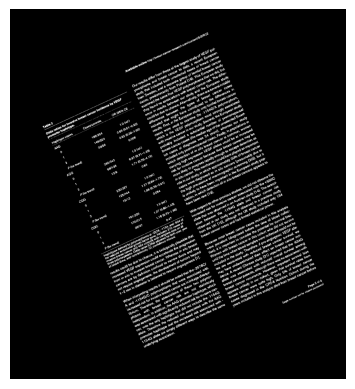

In [73]:
input_image = cv2.imread(image_path)
gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)
thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]


display(thresh)

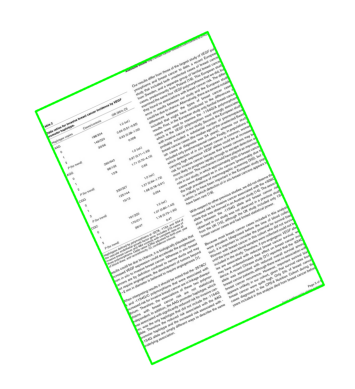

In [78]:
coords = np.column_stack(np.where(thresh > 0))
rect = cv2.minAreaRect(coords)
box = cv2.boxPoints(rect).astype(int)

box[:, [0, 1]] = box[:, [1, 0]]

output_image = input_image.copy()
output = cv2.polylines(output_image, [box], True, (0, 255, 0), 5)
display(output)

In [49]:
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
from skimage.transform import rotate
from skimage.feature import canny
from skimage.io import imread
from skimage.color import rgb2gray
from scipy.stats import mode

from PIL import Image
import time

In [52]:
def skew_angle_hough_transform(image_path):
    start_time = time.time()  
    image = imread(image_path, as_gray=True)
    edges = canny(image)
    tested_angles = np.deg2rad(np.arange(0.1, 180.0))
    h, theta, d = hough_line(edges, theta=tested_angles)
    
    accum, angles, dists = hough_line_peaks(h, theta, d)

    most_common_angle = mode(np.around(angles, decimals=2))[0]
    skew_angle = np.rad2deg(most_common_angle - np.pi/2)
    stop_time = time.time() 
    
    return -skew_angle,(stop_time-start_time)* 1000

In [50]:
image_path = r'D:\tables\skew\PMC1557725_4.jpg'
base_filename = os.path.basename(image_path)
labels_df = pd.read_csv(r'D:\tables\skew\test.csv')
matching_row = labels_df[labels_df['filename'] == base_filename]

if not matching_row.empty:
    print(matching_row)

              filename      angle
6693  PMC1557725_4.jpg  24.719065


In [53]:
skew_angle_hough_transform(image_path)

(24.68281135508616, 450.06847381591797)

In [ ]:
def display(img):
    plt.imshow(img, cmap="gray")
    plt.axis('off')  # Turn off axis
    plt.show()

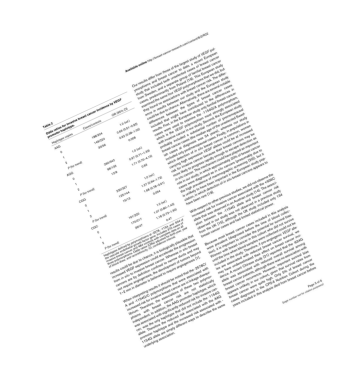

In [55]:
image = imread(image_path, as_gray=True)
display(image)

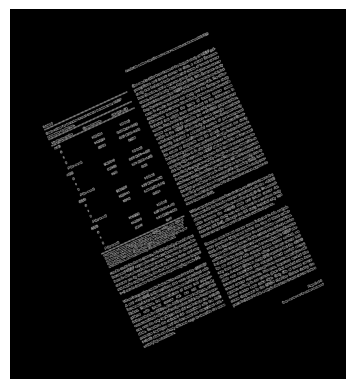

In [56]:
edges = canny(image)
edges_uint8 = (edges * 255).astype('uint8')
display(edges_uint8)

In [57]:
tested_angles = np.deg2rad(np.arange(0.1, 180.0))
h, theta, d = hough_line(edges, theta=tested_angles)

Text(0.5, 1.0, 'Detected lines')

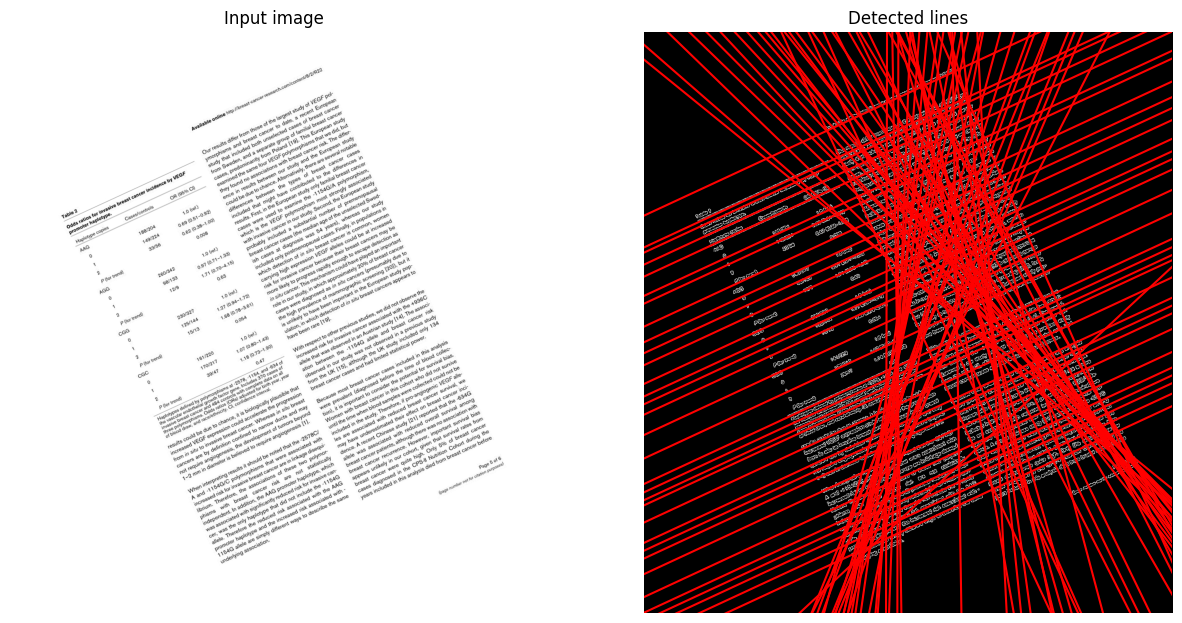

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(15, 16))
ax = axes.ravel()

ax[0].imshow(image, cmap="gray")
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(edges, cmap="gray")
origin = np.array((0, image.shape[1]))

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[1].plot(origin, (y0, y1), '-r')
    
ax[1].set_xlim(origin)
ax[1].set_ylim((edges.shape[0], 0))
ax[1].set_axis_off()
ax[1].set_title('Detected lines')

In [59]:
accum, angles, dists = hough_line_peaks(h, theta, d)
most_common_angle = mode(np.around(angles, decimals=2))[0]
skew_angle = np.rad2deg(most_common_angle - np.pi/2)
skew_angle

-24.68281135508616